In [ ]:
import xarray as xr
import numpy as np
import glob as glob
import functions
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
rpath = '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/land_vars/'
ds_piClim = xr.open_dataset(rpath+'all_land_vars_piClim.nc')
ds_2xCO2 = xr.open_dataset(rpath+'all_land_vars_2xCO2.nc')
ds_4xCO2 = xr.open_dataset(rpath+'all_land_vars_4xCO2.nc')

In [20]:
rpath = '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/'
ds_piClim_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_20250529.snow.clm2.concatfiles.nc')
ds_2xCO2_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_2xCO2_20250529.snow.clm2.concatfiles.nc')
ds_4xCO2_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_4xCO2_20250529.snow.clm2.concatfiles.nc')

In [21]:
# Fix time stamp
ds_piClim_xtra = functions.fix_clm_time(ds_piClim_xtra)
ds_2xCO2_xtra = functions.fix_clm_time(ds_2xCO2_xtra)
ds_4xCO2_xtra = functions.fix_clm_time(ds_4xCO2_xtra)

In [22]:
# Create new variables
ds_list = [ds_piClim, ds_2xCO2, ds_4xCO2]
ds_xtra_list = [ds_piClim_xtra, ds_2xCO2_xtra, ds_4xCO2_xtra]
for ds, ds_xtra in zip(ds_list, ds_xtra_list):
    ds['SNOW_FROM_ATM'] = ds_xtra['SNOW_FROM_ATM']

In [23]:
# Create new variables
ds_list = [ds_piClim, ds_2xCO2, ds_4xCO2]
for ds in ds_list:
    ds['PRECIP_TOTAL'] = ds['SNOW_FROM_ATM']+ds['RAIN_FROM_ATM']

In [24]:
rpath = '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/'
ds_piClim_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_20250529.extra2.clm2.concatfiles.nc')
ds_2xCO2_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_2xCO2_20250529.extra2.clm2.concatfiles.nc')
ds_4xCO2_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_4xCO2_20250529.extra2.clm2.concatfiles.nc')

In [25]:
# Fix time stamp
ds_piClim_xtra = functions.fix_clm_time(ds_piClim_xtra)
ds_2xCO2_xtra = functions.fix_clm_time(ds_2xCO2_xtra)
ds_4xCO2_xtra = functions.fix_clm_time(ds_4xCO2_xtra)

In [26]:
# Create new variables
ds_list = [ds_piClim, ds_2xCO2, ds_4xCO2]
ds_xtra_list = [ds_piClim_xtra, ds_2xCO2_xtra, ds_4xCO2_xtra]
for ds, ds_xtra in zip(ds_list, ds_xtra_list):
    ds['SNOW'] = ds_xtra['SNOW']
    ds['RAIN'] = ds_xtra['RAIN']
    ds['FSNO'] = ds_xtra['FSNO']
    ds['FSNO_EFF'] = ds_xtra['FSNO_EFF']
    ds['FSH_TO_COUPLER'] = ds_xtra['FSH_TO_COUPLER']
    ds['EFLX_LH_TOT'] = ds_xtra['EFLX_LH_TOT']

In [27]:
# Create new variables
ds_list = [ds_piClim, ds_2xCO2, ds_4xCO2]
for ds in ds_list:
    ds['EF'] = ds['EFLX_LH_TOT']/(ds['EFLX_LH_TOT']+ds['FSH_TO_COUPLER'])

In [28]:
rpath = '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/'
ds_piClim_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_20250529.evaptemp.clm2.concatfiles.nc')
ds_2xCO2_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_2xCO2_20250529.evaptemp.clm2.concatfiles.nc')
ds_4xCO2_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_4xCO2_20250529.evaptemp.clm2.concatfiles.nc')

In [29]:
# Fix time stamp
ds_piClim_xtra = functions.fix_clm_time(ds_piClim_xtra)
ds_2xCO2_xtra = functions.fix_clm_time(ds_2xCO2_xtra)
ds_4xCO2_xtra = functions.fix_clm_time(ds_4xCO2_xtra)

In [30]:
# Create new variables
ds_list = [ds_piClim, ds_2xCO2, ds_4xCO2]
ds_xtra_list = [ds_piClim_xtra, ds_2xCO2_xtra, ds_4xCO2_xtra]
for ds, ds_xtra in zip(ds_list, ds_xtra_list):
    ds['TSA'] = ds_xtra['TSA']

In [47]:
# Make a spatial average
Arctic_lim = 60
tslice = slice('2040-01-01','2069-12-31')

# Choose area
lons = slice(0,300)
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90),lon=lons)/(ds_piClim['area'].sel(lat=slice(Arctic_lim,90),lon=lons).sum())
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90), lon=lons, time=tslice)
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90), lon=lons, time=tslice)
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90), lon=lons, time=tslice)
#ds_test = ds_4xCO2.sel(lat=slice(20,30), time=tslice)
#area_weights_test = ds_piClim['area'].sel(lat=slice(20,30))/(ds_piClim['area'].sel(lat=slice(20,30)).sum())


# Monthly averages
ds_piClim_i = ds_piClim_i.groupby(ds_piClim_i.time.dt.month).mean('time')
ds_2xCO2_i = ds_2xCO2_i.groupby(ds_2xCO2_i.time.dt.month).mean('time')
ds_4xCO2_i = ds_4xCO2_i.groupby(ds_4xCO2_i.time.dt.month).mean('time')
#ds_test = ds_test.groupby(ds_test.time.dt.month).mean('time')

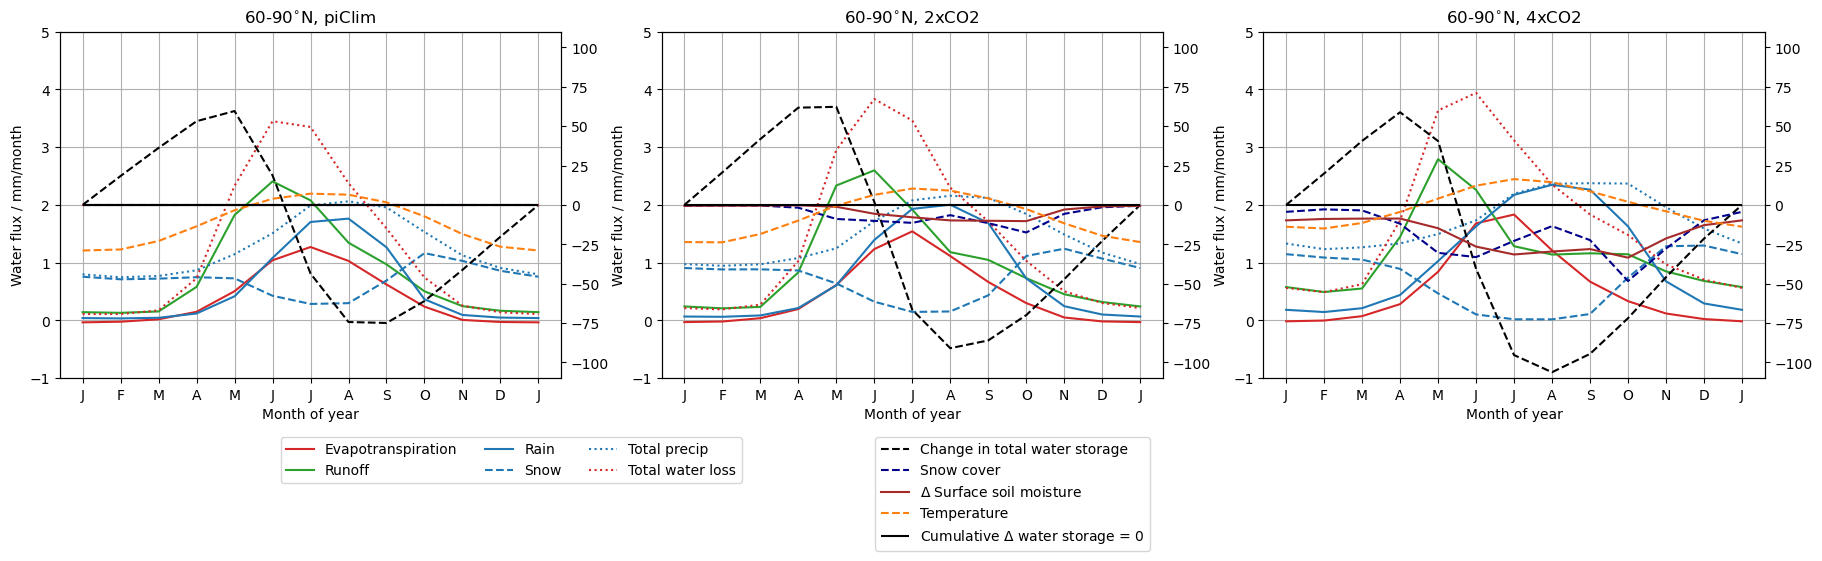

In [34]:
months = np.arange(1, 14, 1)
monthnames = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J']
month_lengths = np.array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])

ds_list = [ds_piClim_i, ds_2xCO2_i, ds_4xCO2_i]
name_list = ['piClim', '2xCO2', '4xCO2']

fig, axes = plt.subplots(1, 3, figsize=[22,5])
for ax, ds, name in zip(axes.flatten(), ds_list, name_list):
    ax2 = ax.twinx()

    # For flux variables
    for var, l, c, ls in zip(['QFLX_EVAP_TOT', 'QRUNOFF', 'RAIN', 'SNOW', 'PRECIP_TOTAL','TOTAL_WATER_LOSS'], ['Evapotranspiration', 'Runoff', 'Rain', 'Snow', 'Total precip','Total water loss'], ['tab:red', 'tab:green', 'tab:blue', 'tab:blue','tab:blue','tab:red'], ['-','-','-','--',':',':']):
        avg = (ds[var]*area_weights).sum(dim=['lon','lat'])*60*60*24#*month_lengths
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        ax.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)

    # For delta variables
    for var, l, c, ls in zip(['TWS'], ['Change in total water storage'], ['k'], ['--']):
        avg = (ds[var]*area_weights).sum(dim=['lon','lat'])
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        deltas = [0]
        cums = [0]
        for i in range(1,13):
            deltas.append(avg_plus_J[i]-avg_plus_J[i-1])
            cums.append(cums[i-1]+(avg_plus_J[i]-avg_plus_J[i-1]))
        #ax2.plot(months, deltas, label=l, color=c, linestyle=ls)
        ax2.plot(months, cums, label=l, color=c, linestyle=ls)

    # For fraction variables
    for var, l, c, ls in zip(['FSNO'], ['Snow cover'], ['darkblue'], ['--']):
        avg = (ds[var]*area_weights).sum(dim=['lon','lat'])*100 - (ds_piClim_i[var]*area_weights).sum(dim=['lon','lat'])*100
        #avg = ((ds[var]*area_weights).sum(dim=['lon','lat']) - (ds_piClim_i[var]*area_weights).sum(dim=['lon','lat']))/(ds_piClim_i[var]*area_weights).sum(dim=['lon','lat'])*100
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)

    # Soil moisture
    for var, l, c, ls in zip(['SOILWATER_10CM'], ['$\Delta$ Surface soil moisture'], ['brown'], ['-']):
        avg = ((ds[var]*area_weights).sum(dim=['lon','lat']) - (ds_piClim_i[var]*area_weights).sum(dim=['lon','lat']))/(ds_piClim_i[var]*area_weights).sum(dim=['lon','lat'])*100
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)

    # Temperature
    for var, l, c, ls in zip(['TSA'], ['Temperature'], ['tab:orange'], ['--']):
        avg = (ds[var]*area_weights).sum(dim=['lon','lat']) - 273.15
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)



    ax.grid()
    ax.set_xlabel('Month of year')
    ax.set_xticks(months)
    ax.set_xticklabels(monthnames)
    ax.set_ylabel('Water flux / mm/month')
    ax.set_title(str(Arctic_lim)+'-90$^{\circ}$N, '+name)
    ax.set_ylim([-1,5])
    ax2.set_ylim([-110,110])
    #ax2.set_ylabel('$\Delta$ Water storage / mm')
    ax2.hlines(0, 1, 13, color='black', label='Cumulative $\Delta$ water storage = 0')

    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# For fraction variables
#for var, l, c, ls in zip(['SOILWATER_10CM'], ['Surface soil moisture sahara?'], ['brown'], ['-']):
#    avg = (ds_test[var]*area_weights_test).sum(dim=['lon','lat'])
#    avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
#    ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(-1.5, -0.15), ncol=3)
ax2.legend(loc='upper center', bbox_to_anchor=(-0.5, -0.15), ncol=1)
plt.show()

In [35]:
# Make a spatial average
Arctic_lim = 60
tslice = slice('2040-01-01','2069-12-31')

# Choose area
lons = slice(0,300)
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90),lon=lons)/(ds_piClim['area'].sel(lat=slice(Arctic_lim,90),lon=lons).sum())
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90), lon=lons, time=tslice)
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90), lon=lons, time=tslice)
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90), lon=lons, time=tslice)
#ds_test = ds_4xCO2.sel(lat=slice(20,30), time=tslice)
#area_weights_test = ds_piClim['area'].sel(lat=slice(20,30))/(ds_piClim['area'].sel(lat=slice(20,30)).sum())


# Monthly averages
ds_piClim_i = ds_piClim_i.groupby(ds_piClim_i.time.dt.month).mean('time')
ds_2xCO2_i = ds_2xCO2_i.groupby(ds_2xCO2_i.time.dt.month).mean('time')
ds_4xCO2_i = ds_4xCO2_i.groupby(ds_4xCO2_i.time.dt.month).mean('time')
#ds_test = ds_test.groupby(ds_test.time.dt.month).mean('time')


rpath= '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/other_cloud_vars/'

landmask = xr.open_dataarray(rpath+'LANDFRAC_piClim.nc')
landmask = landmask.isel(time=0)
oceanmask = 1-landmask

ds_piClim_RH = xr.open_dataset(rpath+'RELHUM_piClim.nc')
ds_2xCO2_RH = xr.open_dataset(rpath+'RELHUM_abrupt-2xCO2.nc')
ds_4xCO2_RH = xr.open_dataset(rpath+'RELHUM_abrupt-4xCO2.nc')
lev = ds_piClim_RH.lev[-1]
var = 'RELHUM'
tslice = slice('2040-01-01', '2069-12-31')

ds_piClim_RH = ds_piClim_RH.sel(lev=lev, time=tslice)
ds_2xCO2_RH = ds_2xCO2_RH.sel(lev=lev, time=tslice)
ds_4xCO2_RH = ds_4xCO2_RH.sel(lev=lev, time=tslice)

piClim_m = ds_piClim_RH.groupby(ds_piClim_RH.time.dt.month).mean('time')
ds_2xCO2_m = ds_2xCO2_RH.groupby(ds_2xCO2_RH.time.dt.month).mean('time')
ds_4xCO2_m = ds_4xCO2_RH.groupby(ds_4xCO2_RH.time.dt.month).mean('time')

piClim_RH_lnd = functions.computeWeightedMeanMasked(piClim_m.sel(lat=slice(Arctic_lim, 90), lon=lons), landmask.sel(lat=slice(Arctic_lim,90), lon=lons))
ds_2xCO2_RH_lnd = functions.computeWeightedMeanMasked(ds_2xCO2_m.sel(lat=slice(Arctic_lim, 90),lon=lons), landmask.sel(lat=slice(Arctic_lim,90), lon=lons))
ds_4xCO2_RH_lnd = functions.computeWeightedMeanMasked(ds_4xCO2_m.sel(lat=slice(Arctic_lim, 90), lon=lons), landmask.sel(lat=slice(Arctic_lim,90), lon=lons))

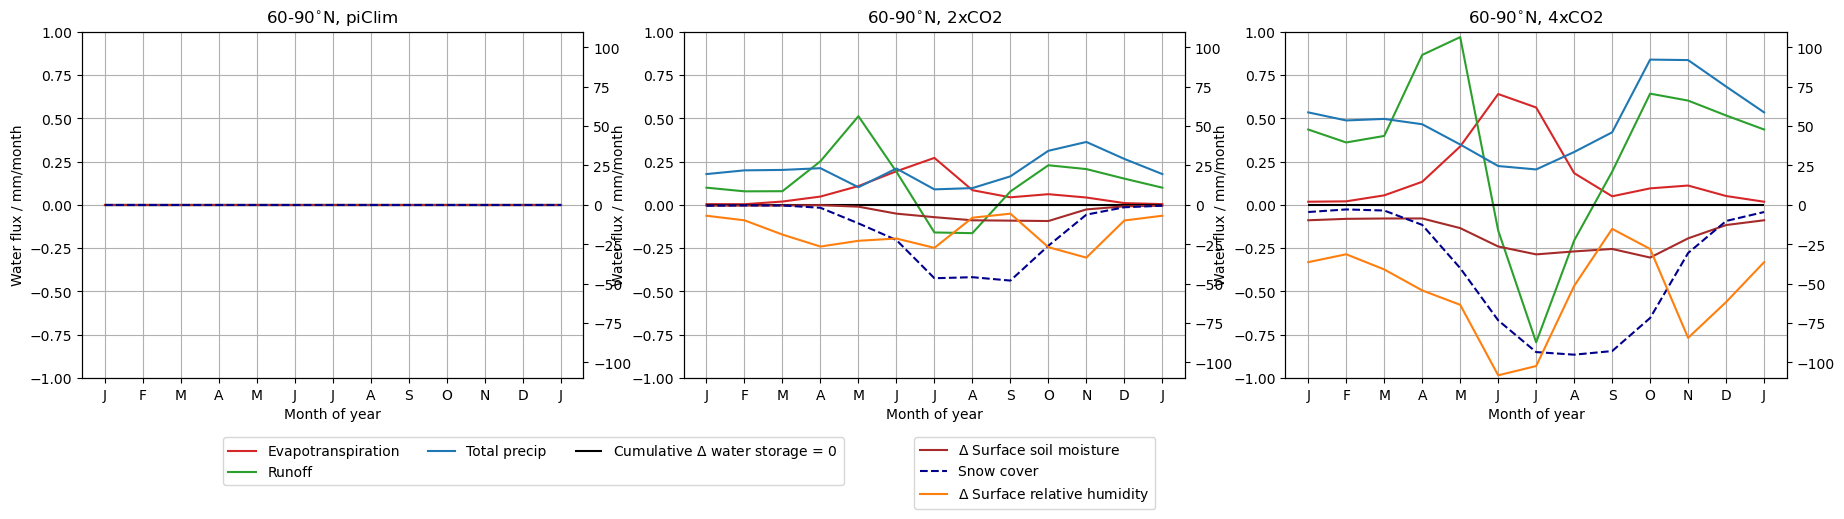

In [ ]:
months = np.arange(1, 14, 1)
monthnames = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J']
month_lengths = np.array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])

ds_list = [ds_piClim_i, ds_2xCO2_i, ds_4xCO2_i]
name_list = ['piClim', '2xCO2', '4xCO2']

fig, axes = plt.subplots(1, 3, figsize=[22,5])
for ax, ds, name in zip(axes.flatten(), ds_list, name_list):
    ax2 = ax.twinx()

    # For flux variables
    for var, l, c, ls in zip(['QFLX_EVAP_TOT', 'QRUNOFF','PRECIP_TOTAL'], ['Evapotranspiration','Runoff','Total precip'], ['tab:red', 'tab:green','tab:blue'], ['-','-','-']):
        avg = (ds[var]*area_weights).sum(dim=['lon','lat'])*60*60*24#*month_lengths
        avg = (ds[var]*area_weights).sum(dim=['lon','lat'])*60*60*24 - (ds_piClim_i[var]*area_weights).sum(dim=['lon','lat'])*60*60*24
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        ax.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)

     # Soil moisture
    for var, l, c, ls in zip(['SOILWATER_10CM'], ['$\Delta$ Surface soil moisture'], ['brown'], ['-']):
        avg = ((ds[var]*area_weights).sum(dim=['lon','lat']) - (ds_piClim_i[var]*area_weights).sum(dim=['lon','lat']))/(ds_piClim_i[var]*area_weights).sum(dim=['lon','lat'])*100
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)
    
    # For fraction variables
    for var, l, c, ls in zip(['FSNO'], ['Snow cover'], ['darkblue'], ['--']):
        #avg = (ds[var]*area_weights).sum(dim=['lon','lat'])*100 - (ds_piClim_i[var]*area_weights).sum(dim=['lon','lat'])*100
        avg = ((ds[var]*area_weights).sum(dim=['lon','lat']) - (ds_piClim_i[var]*area_weights).sum(dim=['lon','lat']))/(ds_piClim_i[var]*area_weights).sum(dim=['lon','lat'])*100
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)

    # Surface relative humidity
    if name == '2xCO2':
        for var, l, c, ls in zip(['RELHUM'], ['$\Delta$ Surface relative humidity'], ['tab:orange'], ['-']):
            avg = (ds_2xCO2_RH_lnd[var] - piClim_RH_lnd[var])*10
            #avg = (ds_2xCO2_RH_lnd[var])

            avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
            ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)
    elif name == '4xCO2':
        for var, l, c, ls in zip(['RELHUM'], ['$\Delta$ Surface relative humidity'], ['tab:orange'], ['-']):
            avg = (ds_4xCO2_RH_lnd[var] - piClim_RH_lnd[var])*10
            #avg = (ds_4xCO2_RH_lnd[var])
            avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
            ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)
    #elif name == 'piClim':
        #for var, l, c, ls in zip(['RELHUM'], ['$\Delta$ Surface relative humidity'], ['tab:orange'], ['-']):
            #avg = (piClim_RH_lnd[var])
            #avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
            #ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)

    ax.grid()
    ax.set_xlabel('Month of year')
    ax.set_xticks(months)
    ax.set_xticklabels(monthnames)
    ax.set_ylabel('Water flux / mm/month')
    ax.set_title(str(Arctic_lim)+'-90$^{\circ}$N, '+name)
    ax.set_ylim([-1,1])
    ax2.set_ylim([-110,110])
    #ax2.set_ylim([-110,110])
    #ax2.set_ylabel('$\Delta$ Water storage / mm')
    #ax2.hlines(0, 1, 13, color='black', label='Cumulative $\Delta$ water storage = 0')
    ax.hlines(0, 1, 13, color='black', label='Cumulative $\Delta$ water storage = 0')

    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(-1.5, -0.15), ncol=3)
ax2.legend(loc='upper center', bbox_to_anchor=(-0.5, -0.15), ncol=1)
plt.show()

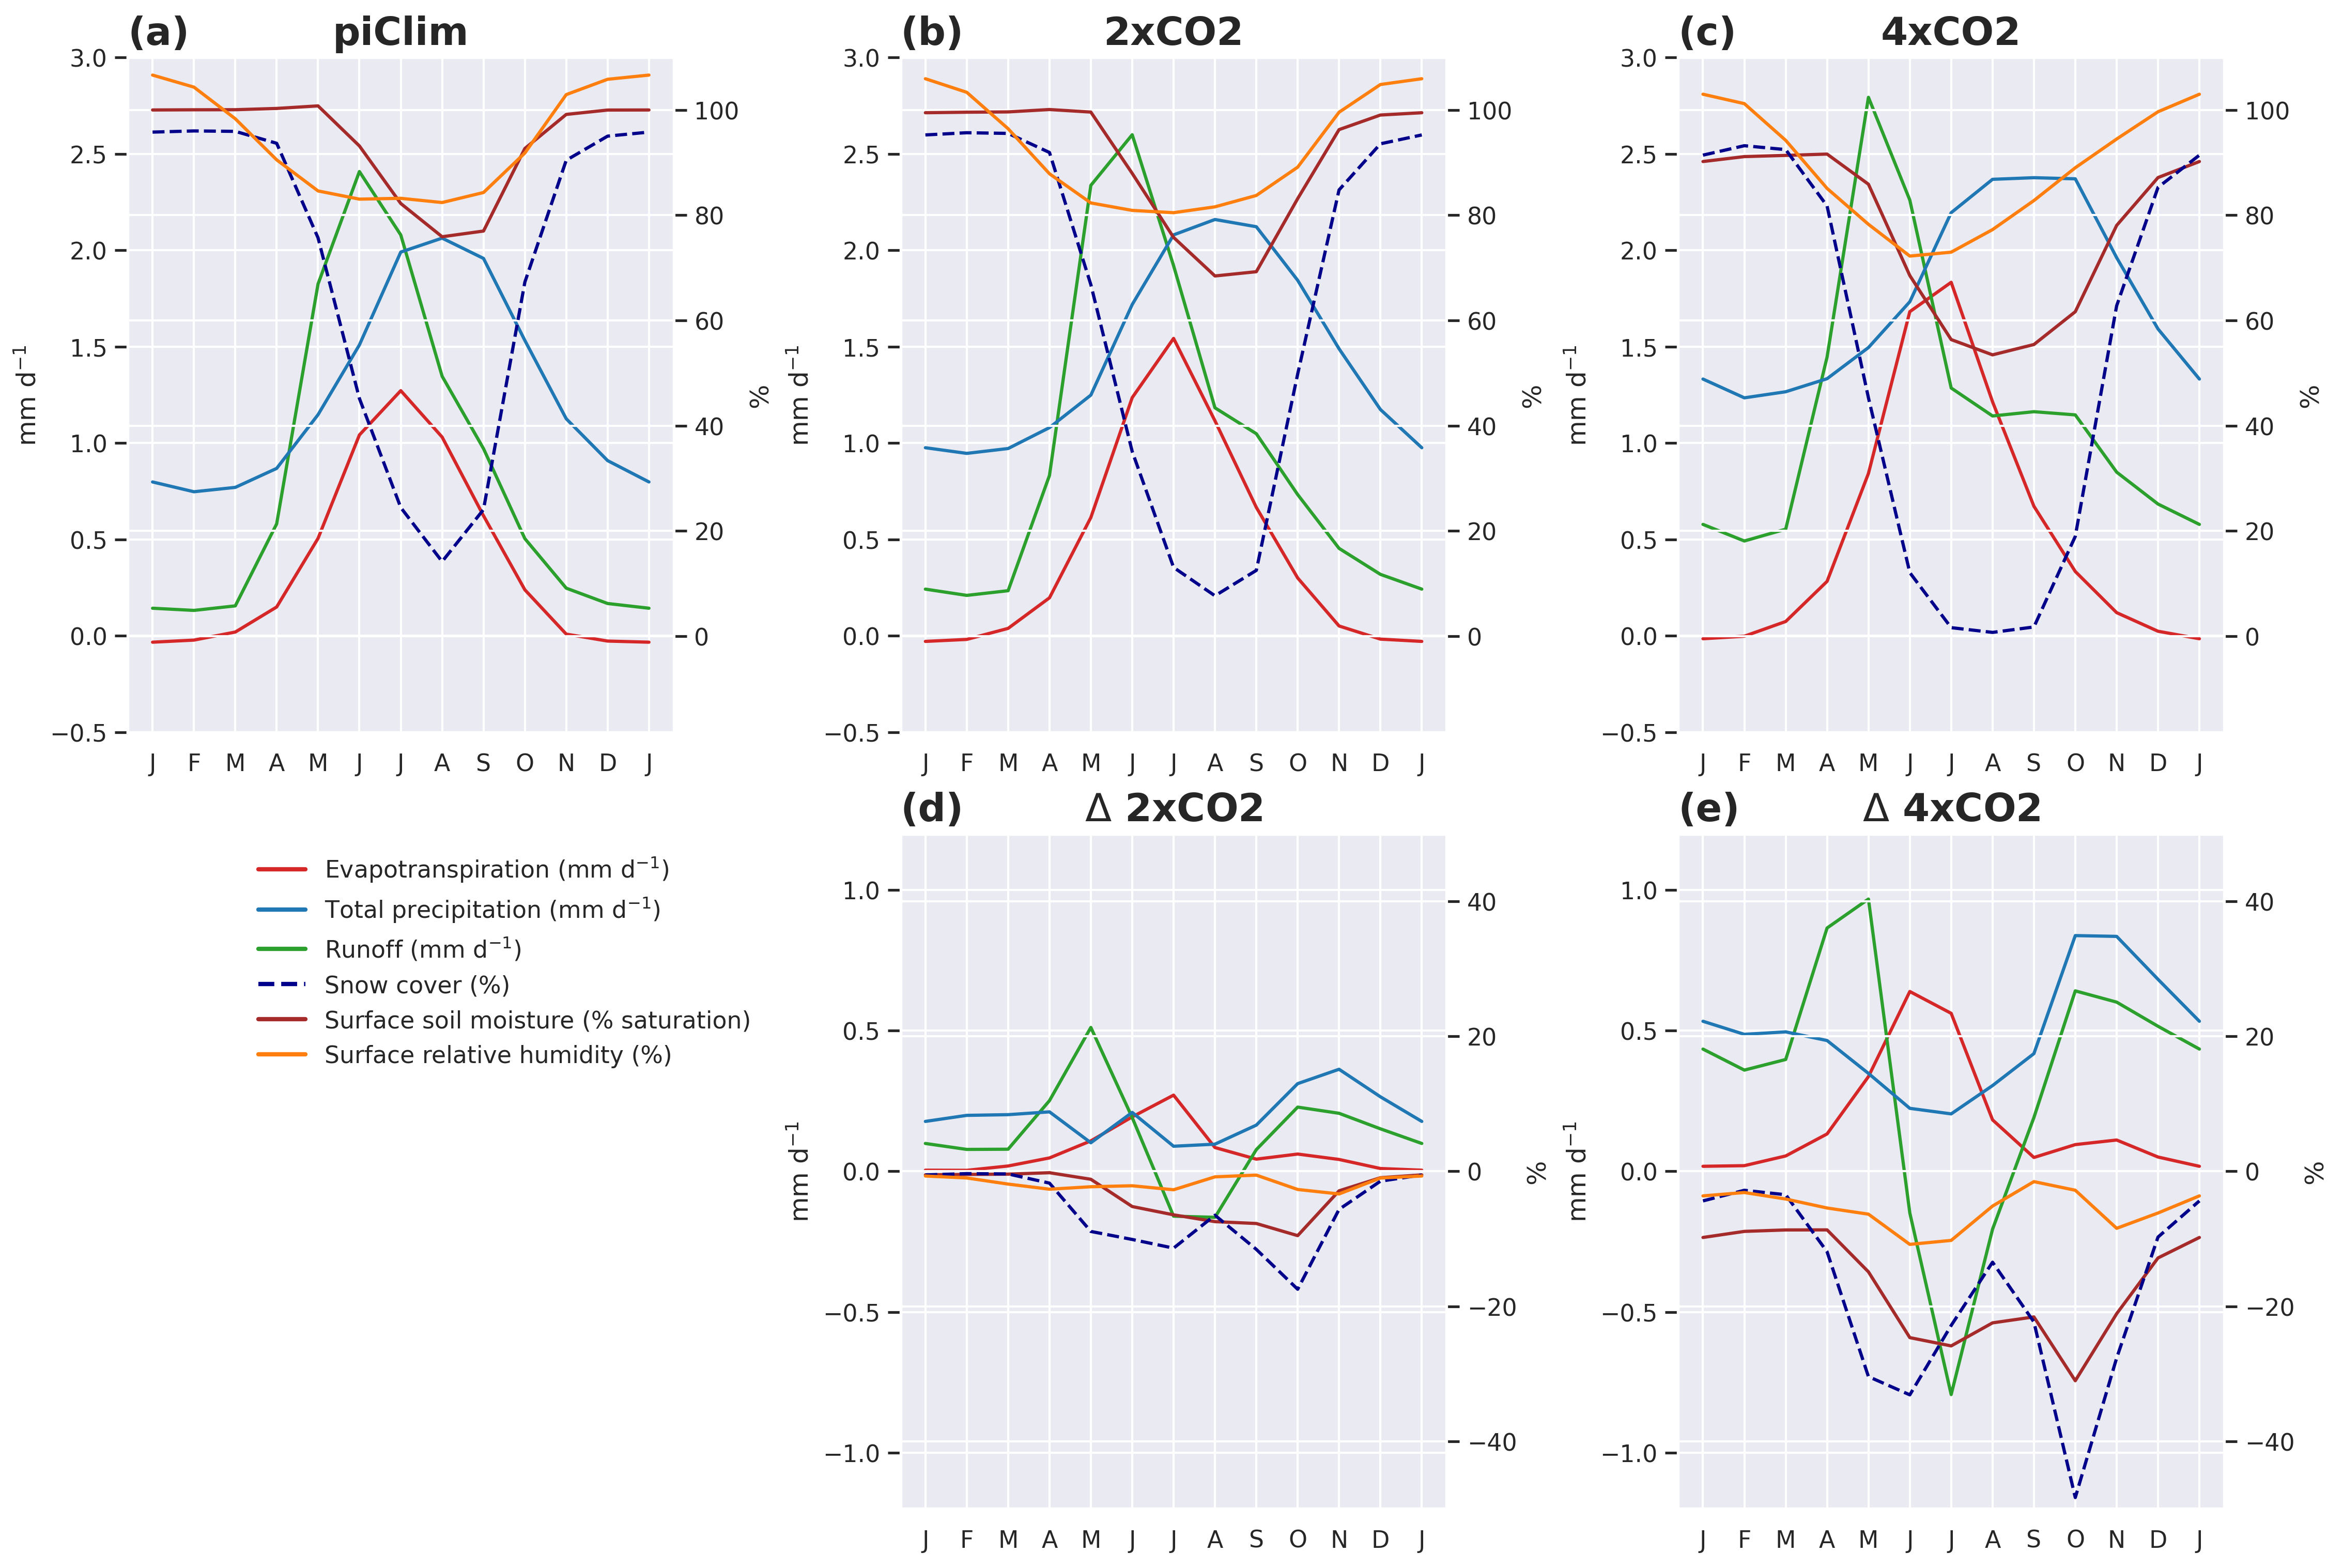

In [104]:
sns.set_theme()
months = np.arange(1, 14, 1)
monthnames = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J']

ds_list = [ds_piClim_i, ds_2xCO2_i, ds_4xCO2_i]
name_list = ['piClim', '2xCO2', '4xCO2']

labels = [['(a)','(b)','(c)'],[' ','(d)','(e)']]

fig, axs = plt.subplot_mosaic(mosaic=labels, figsize=(15, 10),dpi=300,constrained_layout=True)
axs[' '].axis('off')

# Row 1: absolutes
for label, ds, name in zip(labels[0], ds_list, name_list):
    ax = axs[label]
    ax2 = ax.twinx()

    # For flux variables
    for var, l, c, ls in zip(['QFLX_EVAP_TOT', 'QRUNOFF','PRECIP_TOTAL'], ['Evapotranspiration','Runoff','Total precip'], ['tab:red', 'tab:green','tab:blue'], ['-','-','-']):
        avg = (ds[var]*area_weights).sum(dim=['lon','lat'])*60*60*24#*month_lengths
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        ax.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)

     # Soil moisture
    for var, l, c, ls in zip(['SOILWATER_10CM'], ['$\Delta$ Surface soil moisture'], ['brown'], ['-']):
        avg = (ds[var]*area_weights).sum(dim=['lon','lat'])/(ds_piClim_i[var].sel(month=1)*area_weights).sum(dim=['lon','lat'])*100
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)
    
    # For fraction variables
    for var, l, c, ls in zip(['FSNO'], ['Snow cover'], ['darkblue'], ['--']):
        avg = (ds[var]*area_weights).sum(dim=['lon','lat'])*100
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)

    # Surface relative humidity
    if name == '2xCO2':
        for var, l, c, ls in zip(['RELHUM'], ['$\Delta$ Surface relative humidity'], ['tab:orange'], ['-']):
            #avg = (ds_2xCO2_RH_lnd[var] - piClim_RH_lnd[var])*10
            avg = (ds_2xCO2_RH_lnd[var])

            avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
            ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)
    elif name == '4xCO2':
        for var, l, c, ls in zip(['RELHUM'], ['$\Delta$ Surface relative humidity'], ['tab:orange'], ['-']):
            #avg = (ds_4xCO2_RH_lnd[var] - piClim_RH_lnd[var])*10
            avg = (ds_4xCO2_RH_lnd[var])
            avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
            ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)
    elif name == 'piClim':
        for var, l, c, ls in zip(['RELHUM'], ['$\Delta$ Surface relative humidity'], ['tab:orange'], ['-']):
            avg = (piClim_RH_lnd[var])
            avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
            ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)
    

    ax.set_xticks(months)
    ax.set_xticklabels(monthnames)
    ax.set_title(name, fontsize=18,fontweight='bold')
    ax.set_ylim([-0.5,3])
    ax2.set_ylim([-18.3,110])
    ax.set_ylabel('mm d$^{-1}$')
    ax2.set_ylabel('%')

# Row 2: deltas
for label, ds, name in zip(['(d)','(e)'], [ds_2xCO2_i, ds_4xCO2_i], ['$\Delta$ 2xCO2', '$\Delta$ 4xCO2']):
    ax = axs[label]
    ax2 = ax.twinx()

    # For flux variables
    for var, l, c, ls in zip(['QFLX_EVAP_TOT', 'QRUNOFF','PRECIP_TOTAL'], ['Evapotranspiration','Runoff','Total precip'], ['tab:red', 'tab:green','tab:blue'], ['-','-','-']):
        #avg = (ds[var]*area_weights).sum(dim=['lon','lat'])*60*60*24#*month_lengths
        avg = (ds[var]*area_weights).sum(dim=['lon','lat'])*60*60*24 - (ds_piClim_i[var]*area_weights).sum(dim=['lon','lat'])*60*60*24
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        ax.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)

     # Soil moisture
    for var, l, c, ls in zip(['SOILWATER_10CM'], ['$\Delta$ Surface soil moisture'], ['brown'], ['-']):
        #avg = ((ds[var]*area_weights).sum(dim=['lon','lat']) - (ds_piClim_i[var]*area_weights).sum(dim=['lon','lat']))/(ds_piClim_i[var]*area_weights).sum(dim=['lon','lat'])*100
        avg = (ds[var]*area_weights).sum(dim=['lon','lat'])/(ds_piClim_i[var].sel(month=1)*area_weights).sum(dim=['lon','lat'])*100 - (ds_piClim_i[var]*area_weights).sum(dim=['lon','lat'])/(ds_piClim_i[var].sel(month=1)*area_weights).sum(dim=['lon','lat'])*100
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)
    
    # For fraction variables
    for var, l, c, ls in zip(['FSNO'], ['Snow cover'], ['darkblue'], ['--']):
        avg = (ds[var]*area_weights).sum(dim=['lon','lat'])*100 - (ds_piClim_i[var]*area_weights).sum(dim=['lon','lat'])*100
        #avg = ((ds[var]*area_weights).sum(dim=['lon','lat']) - (ds_piClim_i[var]*area_weights).sum(dim=['lon','lat']))/(ds_piClim_i[var]*area_weights).sum(dim=['lon','lat'])*100
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)

    # Surface relative humidity
    if name == '$\Delta$ 2xCO2':
        for var, l, c, ls in zip(['RELHUM'], ['$\Delta$ Surface relative humidity'], ['tab:orange'], ['-']):
            avg = (ds_2xCO2_RH_lnd[var] - piClim_RH_lnd[var])
            avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
            ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)
    elif name == '$\Delta$ 4xCO2':
        for var, l, c, ls in zip(['RELHUM'], ['$\Delta$ Surface relative humidity'], ['tab:orange'], ['-']):
            avg = (ds_4xCO2_RH_lnd[var] - piClim_RH_lnd[var])
            avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
            ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)

    ax.set_xticks(months)
    ax.set_xticklabels(monthnames)
    ax.set_title(name, fontsize=18,fontweight='bold')
    ax.set_ylim([-1.2,1.2])
    ax2.set_ylim([-50,50])
    ax.set_ylabel('mm d$^{-1}$')
    ax2.set_ylabel('%')
   # ax.hlines(0, 1, 13, color='black', label='Cumulative $\Delta$ water storage = 0')

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

legend_elements_1 = [Line2D([0], [0], color='tab:red', lw=2, linestyle='-', label='Evapotranspiration (mm d$^{-1}$)'),
                   Line2D([0], [0], color='tab:blue', lw=2, linestyle='-', label='Total precipitation (mm d$^{-1}$)'),
                   Line2D([0], [0], color='tab:green', lw=2, linestyle='-', label='Runoff (mm d$^{-1}$)'),
                   Line2D([0], [0], color='darkblue', lw=2, linestyle='--', label='Snow cover (%)'),
                Line2D([0], [0], color='brown', lw=2, linestyle='-', label='Surface soil moisture (% saturation)'),
                Line2D([0], [0], color='tab:orange', lw=2, linestyle='-', label='Surface relative humidity (%)')]
axs[' '].legend(handles=legend_elements_1, loc='upper left', bbox_to_anchor=(0.2, 1),frameon=False)

# Label subplots
for label, ax in axs.items():
    ax.set_title(label, loc='left', fontsize=18,fontweight='bold')

fig.savefig('/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/arctic-cloud-feedbacks/article_figs/Fig3.png')
fig.savefig('/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/arctic-cloud-feedbacks/article_figs/Fig3.pdf')

plt.show()